# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
"""
Build your own model
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
## 超參數設定
"""
Set your required experiment parameters
"""


'\nSet your required experiment parameters\n'

In [19]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.1063 - acc: 0.2260 - val_loss: 1.9371 - val_acc: 0.2876
Epoch 2/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.8669 - acc: 0.3239 - val_loss: 1.9695 - val_acc: 0.3006
Epoch 3/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.7734 - acc: 0.3633 - val_loss: 1.8141 - val_acc: 0.3491
Epoch 4/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.7051 - acc: 0.3900 - val_loss: 1.8804 - val_acc: 0.3361
Epoch 5/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.6492 - acc: 0.4107 - val_loss: 1.6669 - val_acc: 0.3959
Epoch 6/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.6020 - acc: 0.4288 - val_loss: 1.7668 - val_acc: 0.3763
Epoch 7/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.5678 - acc: 0.4401 - val_loss: 1.

50000/50000 [==============================] - 12s 232us/step - loss: 2.1109 - acc: 0.2307 - val_loss: 1.9846 - val_acc: 0.2509
Epoch 2/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.8616 - acc: 0.3292 - val_loss: 1.8099 - val_acc: 0.3404
Epoch 3/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.7667 - acc: 0.3649 - val_loss: 1.8592 - val_acc: 0.3404
Epoch 4/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.7023 - acc: 0.3888 - val_loss: 1.8940 - val_acc: 0.3173
Epoch 5/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6490 - acc: 0.4108 - val_loss: 1.8181 - val_acc: 0.3471
Epoch 6/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.6050 - acc: 0.4268 - val_loss: 1.8583 - val_acc: 0.3503
Epoch 7/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.5606 - acc: 0.4433 - val_loss: 1.7008 - val_acc: 0.4062
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.8716 - acc: 0.3245 - val_loss: 1.8306 - val_acc: 0.3459
Epoch 3/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.7743 - acc: 0.3627 - val_loss: 1.8074 - val_acc: 0.3553
Epoch 4/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.7070 - acc: 0.3918 - val_loss: 1.7847 - val_acc: 0.3491
Epoch 5/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6524 - acc: 0.4083 - val_loss: 1.6844 - val_acc: 0.3970
Epoch 6/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6103 - acc: 0.4257 - val_loss: 1.8467 - val_acc: 0.3362
Epoch 7/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.5736 - acc: 0.4395 - val_loss: 1.5713 - val_acc: 0.4416
Epoch 8/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5347 - acc: 0.4509 - val_loss: 1.5382 - val_acc: 0.4513
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 10s 207us/step - loss: 1.8722 - acc: 0.3234 - val_loss: 1.8150 - val_acc: 0.3454
Epoch 3/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7732 - acc: 0.3644 - val_loss: 1.9217 - val_acc: 0.3184
Epoch 4/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.7050 - acc: 0.3911 - val_loss: 1.8072 - val_acc: 0.3378
Epoch 5/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.6549 - acc: 0.4086 - val_loss: 1.6573 - val_acc: 0.4041
Epoch 6/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.6039 - acc: 0.4241 - val_loss: 1.5908 - val_acc: 0.4288
Epoch 7/50
50000/50000 [==============================] - 10s 192us/step - loss: 1.5680 - acc: 0.4410 - val_loss: 1.7768 - val_acc: 0.3834
Epoch 8/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.5391 - acc: 0.4487 - val_loss: 1.6010 - val_acc: 0.4372
Epoch 9/50
50000/50000 [==============

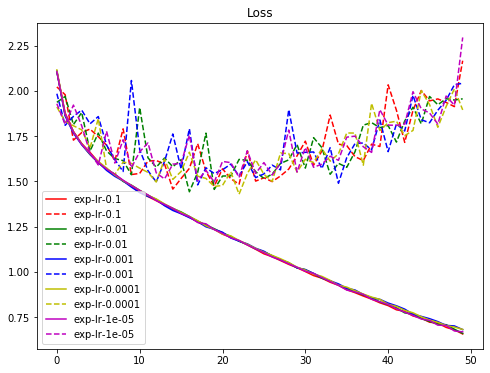

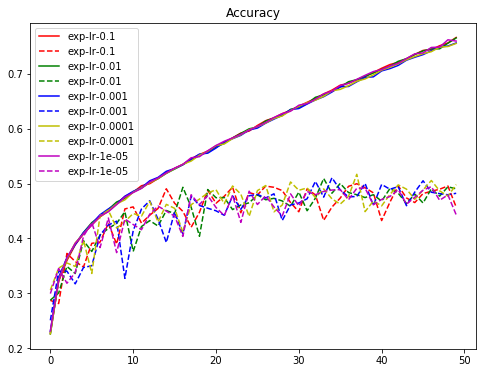

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()